##  Malaria Diagnosis
-  Task
- Data    (From Tensorflow datasets)
- Modelling (CNN)
- Error Sanctioning
- Training and Optimization
- Performance   Measurement
- Validation and testing
- Corrective measures

### Task
 we have a segment of cell we have to tell whether it is parasitized or unparasitized

## Dataset Preparation

In [2]:
### Importing libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from keras.src.ops import dtype
from pandas.io.sas.sas_constants import dataset_length
from tensorflow_datasets.core import dataset_info

In [3]:
ds,ds_info=tfds.load('malaria',with_info=True,as_supervised=True, shuffle_files=True,split=['train'])
print(ds)
print(ds_info)

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]
tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='C:\\Users\\wajah\\tensorflow_datasets\\malaria\\1.0.0',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{raja

In [4]:
for data in ds[0].take(1):
    print(data)

(<tf.Tensor: shape=(151, 115, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


In [5]:
Train_Ratio=0.8
Val_Ratio=0.1
Test_Ratio=0.1
dataset=tf.data.Dataset.range(10)
print(list(dataset.as_numpy_iterator()))
dataset_length=len(dataset)

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]


In [6]:
train_dataset=dataset.take(int(Train_Ratio*dataset_length))
# print(train_dataset)
print(list(train_dataset.as_numpy_iterator()))

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]


In [7]:
val_test_dataset=dataset.skip(int(Train_Ratio*dataset_length))
print(list(val_test_dataset.as_numpy_iterator()))
val_dataset=val_test_dataset.take(int(Val_Ratio*dataset_length))
print(list(val_dataset.as_numpy_iterator()))

[np.int64(8), np.int64(9)]
[np.int64(8)]


In [8]:
test_dataset=val_test_dataset.skip(int(Val_Ratio*dataset_length))
print(list(test_dataset.as_numpy_iterator()))

[np.int64(9)]


In [9]:
def splits(dataset,Train_Ratio,Val_Ratio,Test_Ratio):

    dataset_length=len(dataset)

    train_dataset=dataset.take(int(Train_Ratio*dataset_length))

    val_test_dataset=dataset.skip(int(Train_Ratio*dataset_length))
    val_dataset=val_test_dataset.take(int(Val_Ratio*dataset_length))

    test_dataset=val_test_dataset.skip(int(Val_Ratio*dataset_length))
    return train_dataset,val_dataset,test_dataset

In [10]:
TrainRatio=0.6
ValRatio=0.2
TestRatio=0.2

dataset=tf.data.Dataset.range(10)

TR,VD,TED=splits(dataset,TrainRatio,ValRatio,TestRatio)
print(list(TR.as_numpy_iterator()), list(VD.as_numpy_iterator()), list(TED.as_numpy_iterator()))

[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)] [np.int64(6), np.int64(7)] [np.int64(8), np.int64(9)]


### Now test this function in dataset

In [11]:
train_dataset,val_dataset,test_dataset=splits(ds[0],TrainRatio, ValRatio, TestRatio)
print(list(test_dataset.take(1).as_numpy_iterator()),list(val_dataset.take(1).as_numpy_iterator()),list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), np.int64(1))] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0,

###  Data Visulization

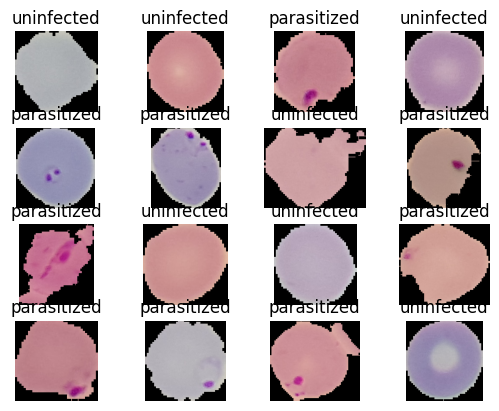

In [21]:
for i, (img, label) in enumerate(train_dataset.take(16)):
    ax = plt.subplot(4, 4, i + 1)
    imshow = plt.imshow(img)
    plt.axis('off')
    plt.title(ds_info.features['label'].int2str(label))

Text(0.5, 1.0, 'parasitized')

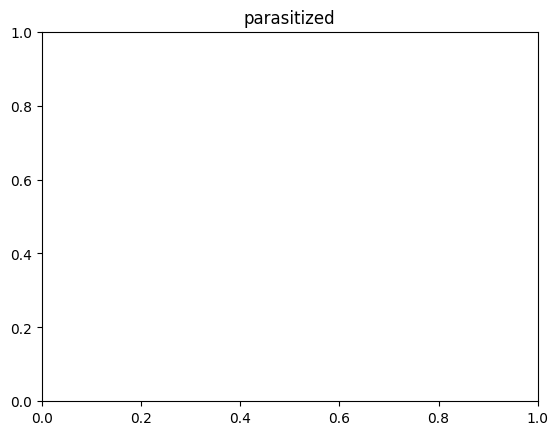

In [22]:
plt.title(ds_info.features['label'].int2str(0))

## Data Preprocessing
- resize the image
- normalize the image
    - we have two techniques
        - Standarization x=(x-Mu)/standard deviation
        - Normalization  z=(x-xmin)/(xmax-xmin)
                - we choose normalization

In [25]:
im_Size=224
def resizing(image,label):
    return tf.image.resize(image,[im_Size,im_Size]),label

In [26]:
train_dataset=train_dataset.map(resizing)

In [29]:
for img,label in train_dataset.take(16):
    print(img,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0

In [31]:
##  Scalling
im_Size=224
def resize_rescale(image,label):
    return tf.image.resize(image,[im_Size,im_Size])/255,label

In [32]:
train_dataset=train_dataset.map(resize_rescale)

In [33]:
for  img,label in train_dataset.take(16):
    print(img,label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0

In [34]:
train_dataset=train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

##  How and why convnets work?